In [1]:
import geopandas as geo
import pandas as pd
%config InlineBackend.figure_format ='retina'

In [14]:
from re import sub
from decimal import Decimal
import matplotlib.pyplot as plt

In [3]:
from shapely.geometry import Point, Polygon

In [4]:
import contextily as cx
import numpy as np

In [5]:
data=pd.read_csv('~/TX_appleseed_lenders_public/data/cleanedpayday(1).csv')

In [6]:
geometry = [Point(xy) for xy in zip(data['Long'],data['Lat'])]

geo_pts_payday = geo.GeoDataFrame(data,geometry=geometry,crs="EPSG:4326")

In [7]:
geometry = [Point(xy) for xy in zip(data['Long'],data['Lat'])]

geo_pts_payday = geo.GeoDataFrame(data,geometry=geometry,crs="EPSG:4326")

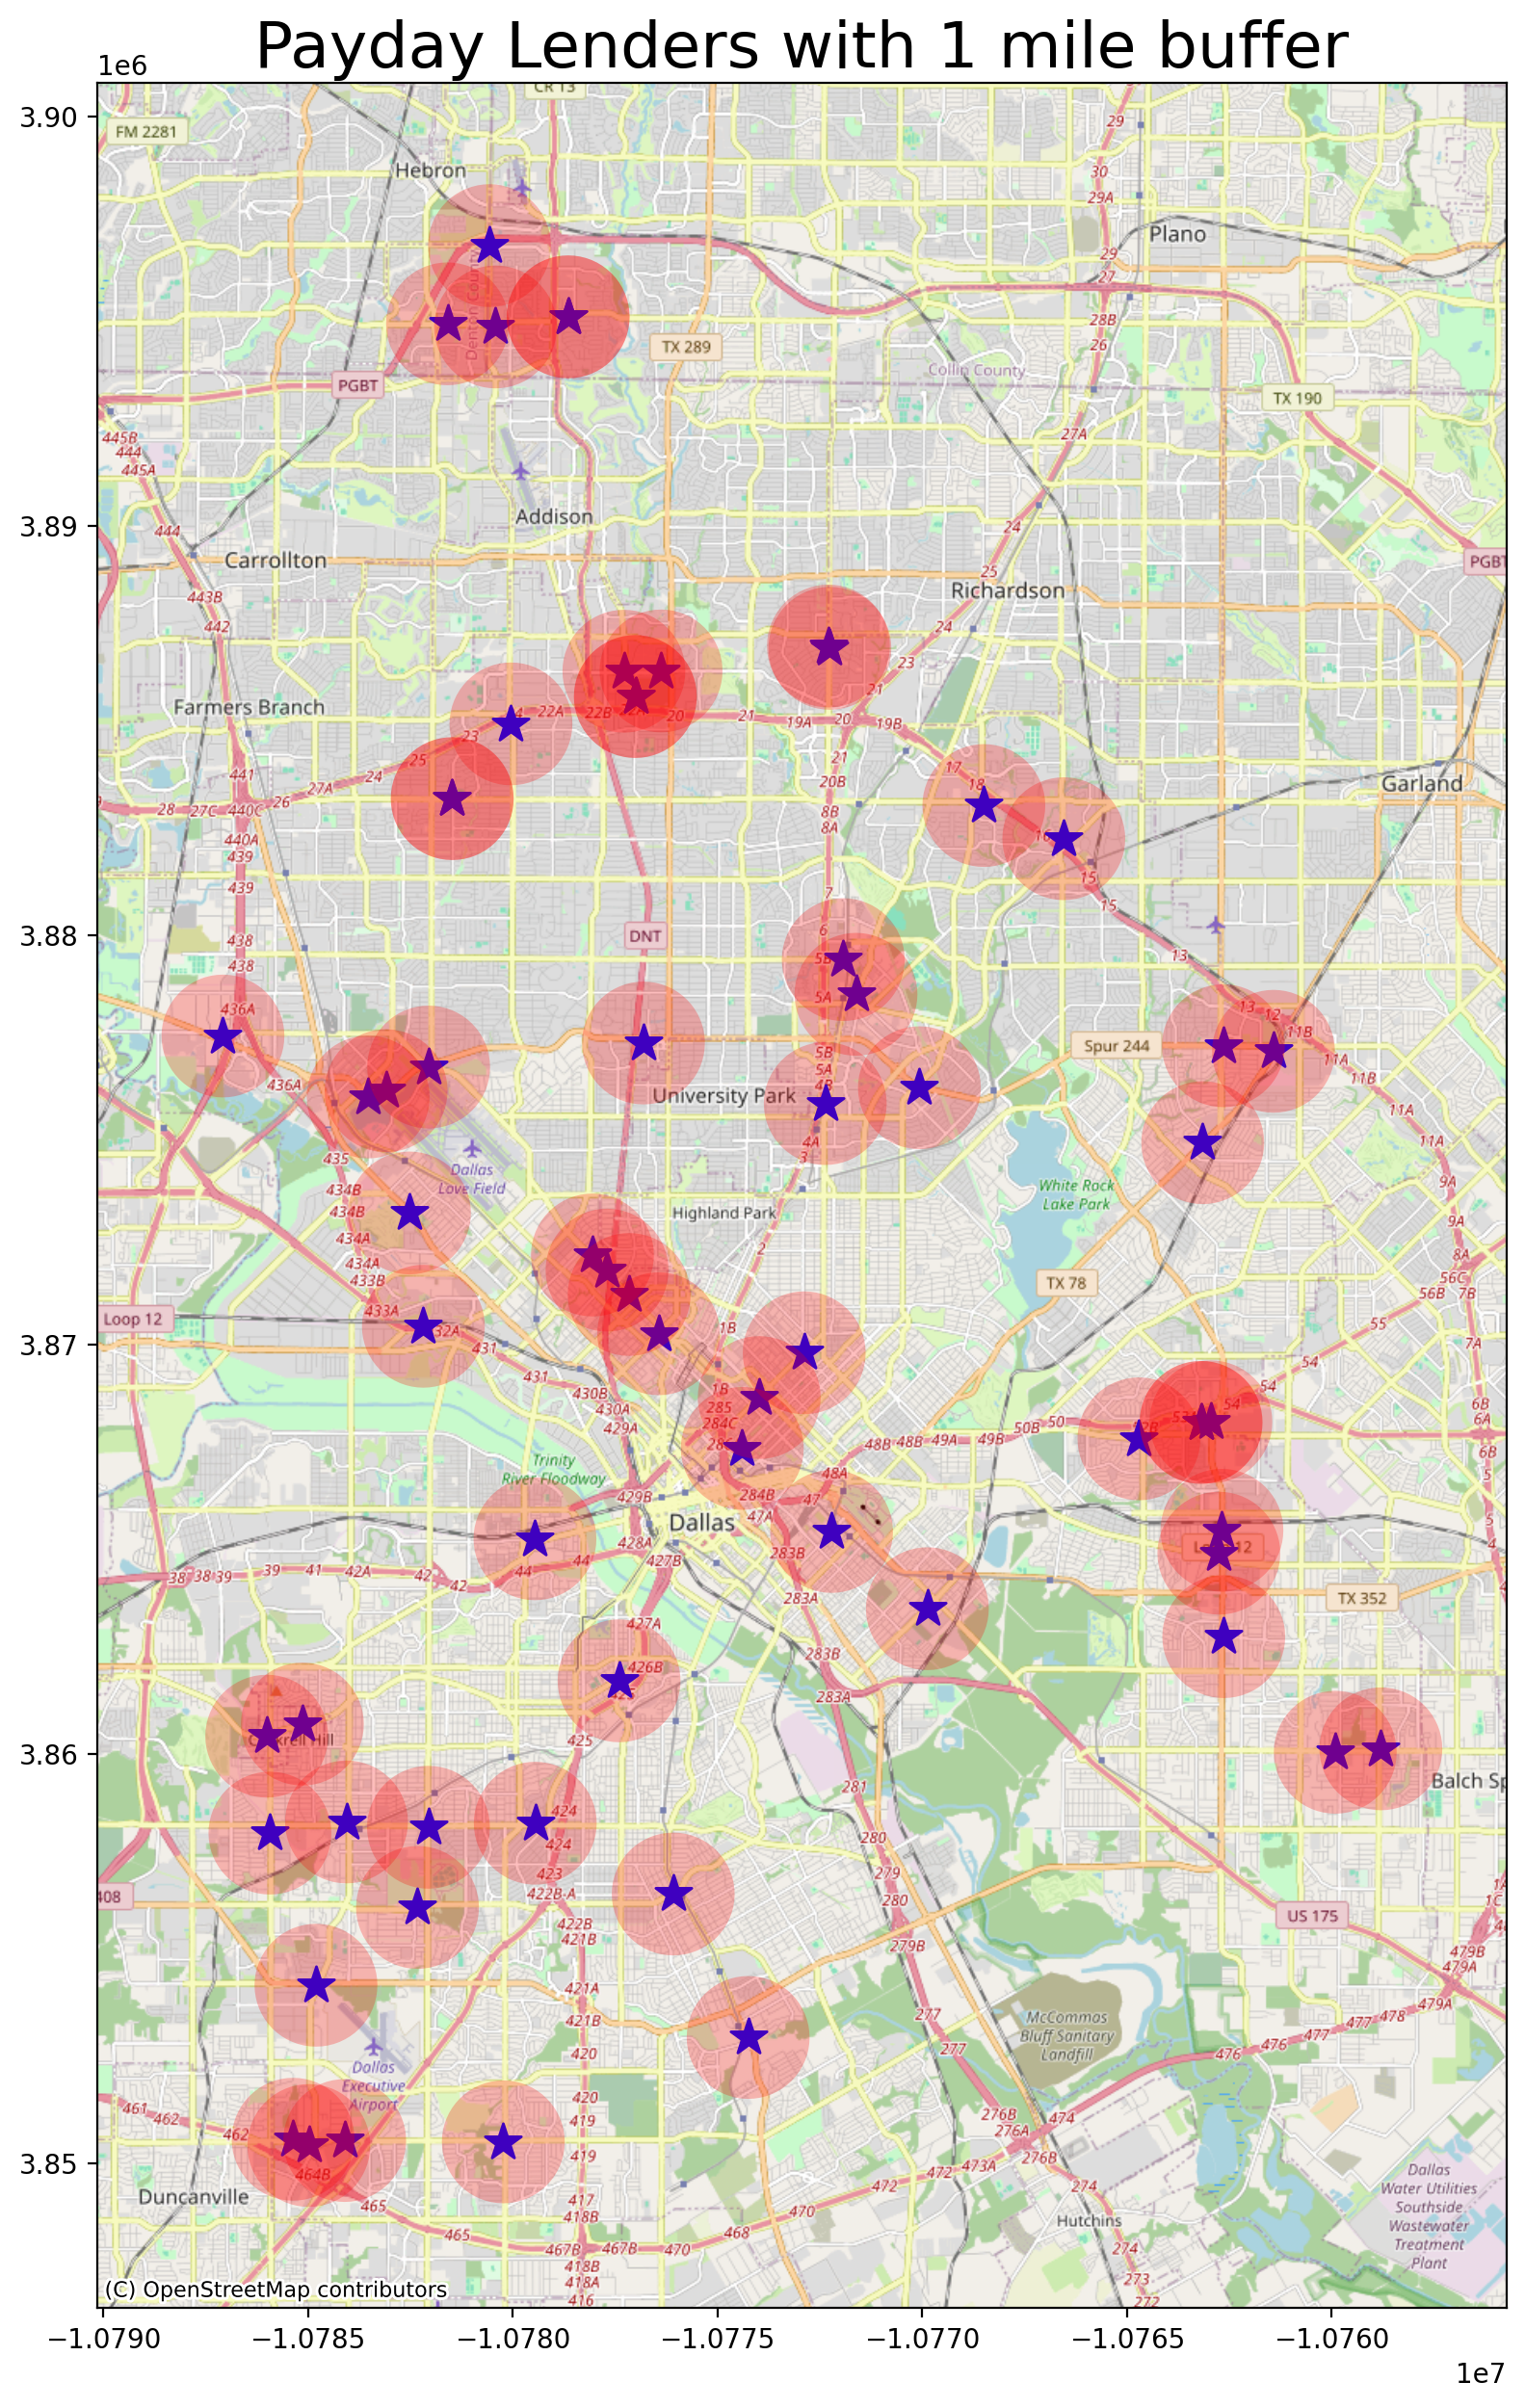

In [15]:
geo_pts_wm_payday = geo_pts_payday.to_crs(epsg=3857)
buffer = geo_pts_wm_payday.buffer(1500)
ax = geo_pts_wm_payday.plot(marker='*', color='blue', markersize=200, alpha=1,legend=True, figsize=(15,15))
buffer.plot(ax=ax,color='red',alpha=.25)

cx.add_basemap(ax,source=cx.providers.OpenStreetMap.Mapnik, zoom=14)
cx.add_basemap(ax,source=cx.providers.OpenStreetMap.Mapnik, zoom=12)

ax.set_title('Payday Lenders with 1 mile buffer', fontsize=24)
plt.savefig('../results/lendersbuffer.png', dpi=1200)